### CHAPTER FOUR

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

# File directories
# from pathlib import Path
# import os

np.random.seed(7) # To make repeatable
LEARNING_RATE = 0.01
EPOCHS = 20
# Data dir
# data_dir = Path.cwd() / "data"
TRAIN_IMAGE_FILENAME = 'data/mnist/train-images.idx3-ubyte'
TRAIN_LABEL_FILENAME = 'data/mnist/train-labels.idx1-ubyte'
TEST_IMAGE_FILENAME = 'data/mnist/t10k-images.idx3-ubyte'
TEST_LABEL_FILENAME = 'data/mnist/t10k-labels.idx1-ubyte'

In [16]:
# Read files.
train_images = idx2numpy.convert_from_file(
    TRAIN_IMAGE_FILENAME)
train_labels = idx2numpy.convert_from_file(
    TRAIN_LABEL_FILENAME)
test_images = idx2numpy.convert_from_file(TEST_IMAGE_FILENAME)
test_labels = idx2numpy.convert_from_file(TEST_LABEL_FILENAME)

In [17]:
# Print dimensions.
print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)
print('dimensions of test_images: ', test_images.shape)
print('dimensions of test_images: ', test_labels.shape)

dimensions of train_images:  (60000, 28, 28)
dimensions of train_labels:  (60000,)
dimensions of test_images:  (10000, 28, 28)
dimensions of test_images:  (10000,)


In [18]:
train_images[0].shape

(28, 28)

In [19]:
# print?

In [20]:
# Print one training example.
print('label for first training example: ', train_labels[1])
print('---beginning of pattern for first training example---')
for line in train_images[1]:
    for num in line:
        if num > 0:
            print('*', end=' ')
        else:
            print(' ', end = ' ')
    print('')
print('---end of pattern for first training example---')

label for first training example:  0
---beginning of pattern for first training example---
                                                        
                                                        
                                                        
                                                        
                              * * * * *                 
                            * * * * * *                 
                          * * * * * * * * *             
                      * * * * * * * * * * *             
                      * * * * * * * * * * *             
                    * * * * * * * * * * * *             
                  * * * * * * * * *     * * *           
                * * * * * *             * * *           
              * * * * * * *             * * *           
              * * * *                   * * *           
              * * *                     * * *           
            * * * *                     * * *         

In [21]:
# Function to read dataset.
def read_mnist():
    train_images = idx2numpy.convert_from_file(
        TRAIN_IMAGE_FILENAME)
    train_labels = idx2numpy.convert_from_file(
        TRAIN_LABEL_FILENAME)
    test_images = idx2numpy.convert_from_file(
        TEST_IMAGE_FILENAME)
    test_labels = idx2numpy.convert_from_file(
        TEST_LABEL_FILENAME)

    # Reformat and standardize.
    x_train = train_images.reshape(60000, 784)
    mean = np.mean(x_train)
    stddev = np.std(x_train)
    x_train = (x_train - mean) / stddev
    x_test = test_images.reshape(10000, 784)
    x_test = (x_test - mean) / stddev

    # One-hot encoded output.
    y_train = np.zeros((60000, 10))
    y_test = np.zeros((10000, 10))
    for i, y in enumerate(train_labels):
        y_train[i][y] = 1
    for i, y in enumerate(test_labels):
        y_test[i][y] = 1
    return x_train, y_train, x_test, y_test

In [22]:
# Read train and test examples.
x_train, y_train, x_test, y_test = read_mnist()
index_list = list(range(len(x_train))) # Used for random order

In [23]:
def layer_w(neuron_count, input_count):
    weights = np.zeros((neuron_count, input_count+1))
    for i in range(neuron_count):
        for j in range(1, (input_count+1)):
            weights[i][j] = np.random.uniform(-0.1, 0.1)
    return weights

In [33]:
# Declare matrices and vectors representing the neurons.
hidden_layer_w: "The first and final hidden layer" = layer_w(25, 784)
hidden_layer_y: "The 25 outputs from the first and last hidden layer" = np.zeros(25)
hidden_layer_error: "The errors made at the output of the hidden layer" = np.zeros(25)

In [25]:
output_layer_w = layer_w(10, 25)
output_layer_y = np.zeros(10)
output_layer_error = np.zeros(10)

In [26]:
chart_x = []
chart_y_train = []
chart_y_test = []
def show_learning(epoch_no, train_acc, test_acc):
    global chart_x
    global chart_y_train
    global chart_y_test
    print('epoch no:', epoch_no, ', train_acc: ',
          '%6.4f' % train_acc,
          ', test_acc: ', '%6.4f' % test_acc)
    chart_x.append(epoch_no + 1)
    chart_y_train.append(1.0 - train_acc)
    chart_y_test.append(1.0 - test_acc)

In [27]:
def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-',
             label='training error')
    plt.plot(chart_x, chart_y_test, 'b-',
             label='test error')
    plt.axis([0, len(chart_x), 0.0, 1.0])
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()

In [31]:
for i, w in enumerate(output_layer_w):
    print(i, w.shape)
    break


0 (26,)


In [32]:
def forward_pass(x):
    global hidden_layer_y
    global output_layer_y
    # Activation function for hidden layer
    for i, w in enumerate(hidden_layer_w):
        z = np.dot(w, x)
        hidden_layer_y[i] = np.tanh(z)
    hidden_output_array = np.concatenate(
        (np.array([1.0]), hidden_layer_y)) # Pad inout with 1.0 (bias term)
    # Activation function for output layer
    for i, w in enumerate(output_layer_w):
        z = np.dot(w, hidden_output_array)
        output_layer_y[i] = 1.0 / (1.0 + np.exp(-z))

In [51]:
def backward_pass(y_truth):
    global hidden_layer_error
    global output_layer_error
    # Backpropagate error for each output neuron
    # and create array of all output neuron errors.
    for i, y in enumerate(output_layer_y):
        error_prime = -(y_truth[i] - y) # Loss derivative
        derivative = y * (1.0 - y) # Logistic derivative
        output_layer_error[i] = error_prime * derivative
    for i, y in enumerate(hidden_layer_y):
        # Create array weights connecting the output of
        # hidden neuron i to neurons in the output layer.
        error_weights = []
        for w in output_layer_w:
            error_weights.append(w[i+1])
        error_weight_array = np.array(error_weights)
        # Backpropagate error for hidden neuron.
        derivative = 1.0 - y**2 # tanh derivative
        weighted_error = np.dot(error_weight_array,
                                output_layer_error)
        hidden_layer_error[i] = weighted_error * derivative

In [43]:
def adjust_weights(x):
    global output_layer_w
    global hidden_layer_w
    for i, error in enumerate(hidden_layer_error):
        hidden_layer_w[i] -= (x * LEARNING_RATE
                              * error) # Update all weights
    hidden_output_array = np.concatenate(
        (np.array([1.0]), hidden_layer_y))
    for i, error in enumerate(output_layer_error):
        output_layer_w[i] -= (hidden_output_array
                              * LEARNING_RATE
                              * error) # Update all weights

epoch no: 0 , train_acc:  0.8555 , test_acc:  0.9176
epoch no: 1 , train_acc:  0.9176 , test_acc:  0.9256
epoch no: 2 , train_acc:  0.9265 , test_acc:  0.9257
epoch no: 3 , train_acc:  0.9317 , test_acc:  0.9310
epoch no: 4 , train_acc:  0.9356 , test_acc:  0.9340
epoch no: 5 , train_acc:  0.9385 , test_acc:  0.9354
epoch no: 6 , train_acc:  0.9399 , test_acc:  0.9391
epoch no: 7 , train_acc:  0.9423 , test_acc:  0.9354
epoch no: 8 , train_acc:  0.9441 , test_acc:  0.9365
epoch no: 9 , train_acc:  0.9460 , test_acc:  0.9384
epoch no: 10 , train_acc:  0.9464 , test_acc:  0.9355
epoch no: 11 , train_acc:  0.9474 , test_acc:  0.9312
epoch no: 12 , train_acc:  0.9494 , test_acc:  0.9385
epoch no: 13 , train_acc:  0.9503 , test_acc:  0.9395
epoch no: 14 , train_acc:  0.9505 , test_acc:  0.9406
epoch no: 15 , train_acc:  0.9519 , test_acc:  0.9405
epoch no: 16 , train_acc:  0.9519 , test_acc:  0.9396
epoch no: 17 , train_acc:  0.9529 , test_acc:  0.9412
epoch no: 18 , train_acc:  0.9537 , te

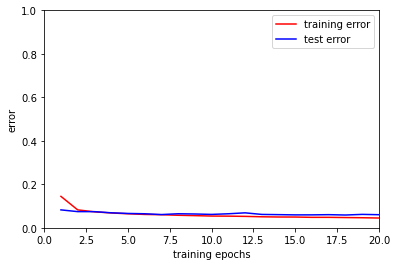

In [53]:
# Network training loop.
for i in range(EPOCHS): # Train EPOCHS iterations
    np.random.shuffle(index_list) # Randomize order
    correct_training_results = 0
    for j in index_list: # Train on all examples
        x = np.concatenate((np.array([1.0]), x_train[j])) # Pad X with 1.0 for the bias term.
        forward_pass(x)
        if output_layer_y.argmax() == y_train[j].argmax():
            correct_training_results += 1
        backward_pass(y_train[j])
        adjust_weights(x)

    correct_test_results = 0
    for j in range(len(x_test)): # Evaluate network
        x = np.concatenate((np.array([1.0]), x_test[j]))
        forward_pass(x)
        if output_layer_y.argmax() == y_test[j].argmax():
            correct_test_results += 1
    # Show progress.
    show_learning(i, correct_training_results/len(x_train),
                  correct_test_results/len(x_test))
plot_learning() # Create plot